#  THIS NOTEBOOK IS ONLY FOR MY PROJECT VISUALISATION

In [1]:
import numpy as np
import pandas as pd
import time,os
from tqdm import tqdm
# Vizualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


2024-03-23 18:10:12.734394: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-23 18:10:12.776128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:10:12.978348: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:10:12.979386: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 18:10:14.045628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Loading Data Sets 

In [3]:
train_df = '/home/oem/Documents/CAPSTONE/train.csv'
test_df = '/home/oem/Documents/CAPSTONE/test.csv'

train_data = pd.read_csv(train_df)
test_data = pd.read_csv(test_df)

print('Train Data shape:', train_data.shape)
print('Test Data shape:', test_data.shape)

Train Data shape: (9885, 14)
Test Data shape: (8, 13)


In [4]:
from glob import glob

# Getting the image data (the .jpg data) 
train_jpg = glob('/home/oem/Documents/CAPSTONE/train/*.jpg')
test_jpg = glob('/home/oem/Documents/CAPSTONE/test/*.jpg')

## Exploratory Data Analysis and Data Preprocessing

In [5]:
print('Train Data Columns:', train_data.columns)
print('Test Data Columns:', test_data.columns)


Train Data Columns: Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur',
       'Pawpularity'],
      dtype='object')
Test Data Columns: Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')


In [6]:
train_data.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [7]:
print('Train Data Missing values:', train_data.info())
print('Test Data Missing values:', test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9885 entries, 0 to 9884
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9885 non-null   object
 1   Subject Focus  9885 non-null   int64 
 2   Eyes           9885 non-null   int64 
 3   Face           9885 non-null   int64 
 4   Near           9885 non-null   int64 
 5   Action         9885 non-null   int64 
 6   Accessory      9885 non-null   int64 
 7   Group          9885 non-null   int64 
 8   Collage        9885 non-null   int64 
 9   Human          9885 non-null   int64 
 10  Occlusion      9885 non-null   int64 
 11  Info           9885 non-null   int64 
 12  Blur           9885 non-null   int64 
 13  Pawpularity    9885 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB
Train Data Missing values: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column         N

There are non-null values in both data sets.

In [8]:
train_data.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000
mean,0.027618,0.772281,0.903794,0.861507,0.009914,0.067678,0.129287,0.049064,0.165908,0.171472,0.060799,0.070612,38.049975
std,0.163883,0.419381,0.294889,0.345434,0.099079,0.251206,0.335534,0.216013,0.372017,0.376940,0.238974,0.256189,20.599055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [9]:
test_data.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
count,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,0.625000,0.25000,0.625000,0.25000,0.375000,0.625000,0.500000,0.625000,0.25000,0.500000,0.625000,0.500000
std,0.517549,0.46291,0.517549,0.46291,0.517549,0.517549,0.534522,0.517549,0.46291,0.534522,0.517549,0.534522
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.500000,1.000000,0.00000,0.500000,1.000000,0.500000
75%,1.000000,0.25000,1.000000,0.25000,1.000000,1.000000,1.000000,1.000000,0.25000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Vizualisation

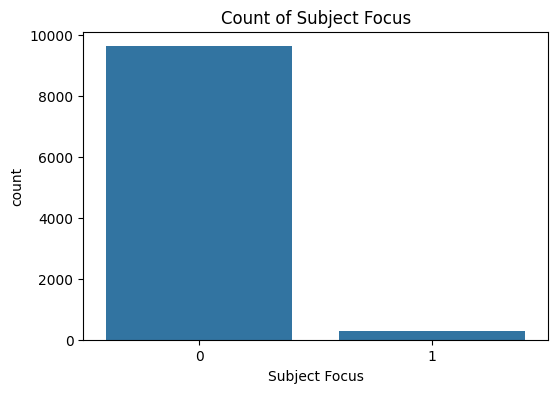

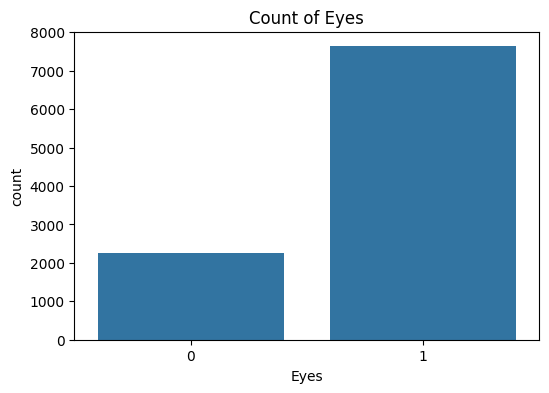

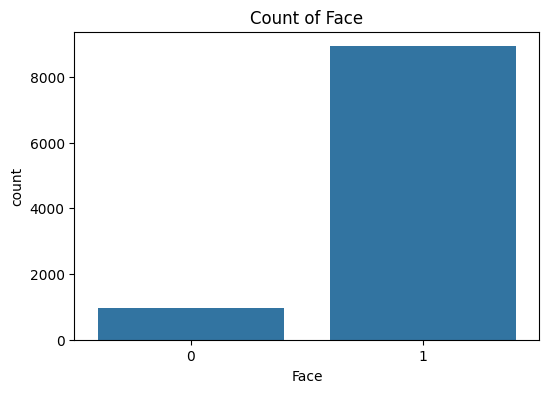

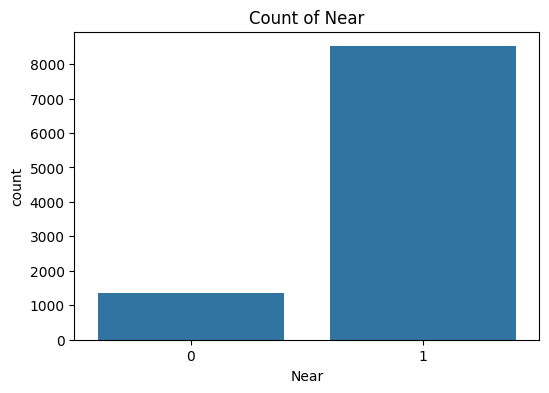

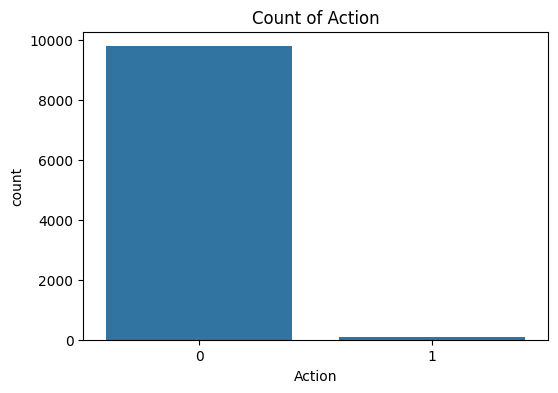

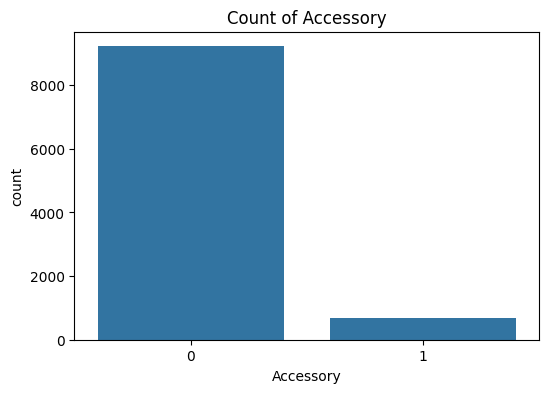

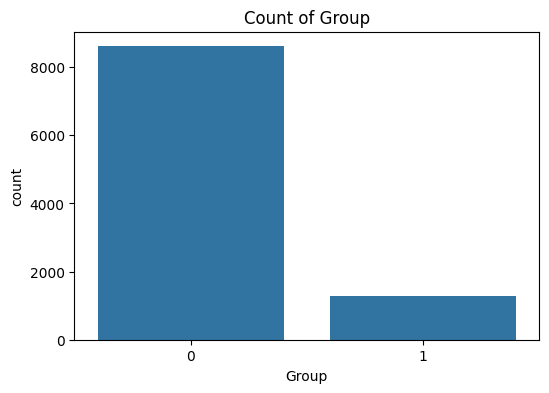

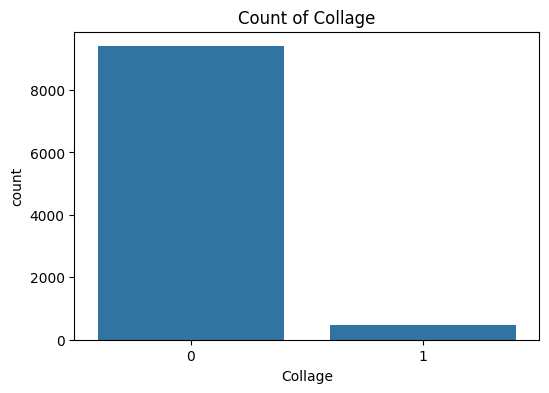

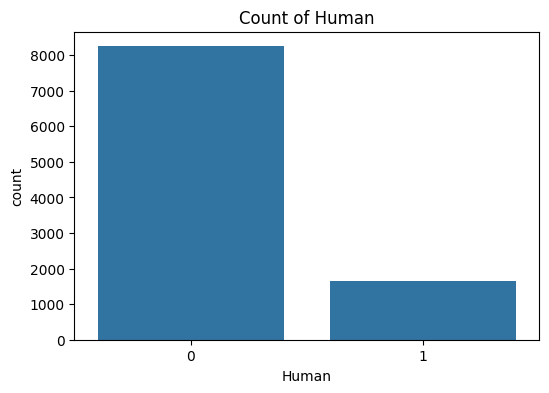

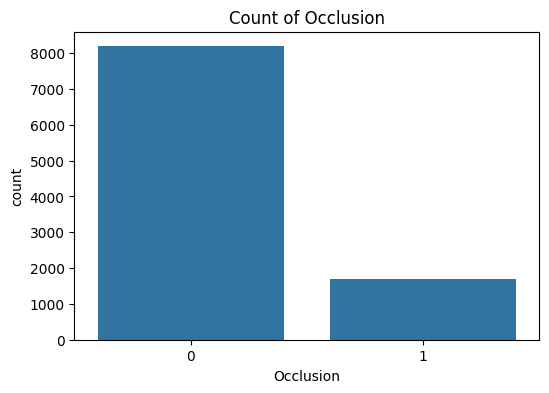

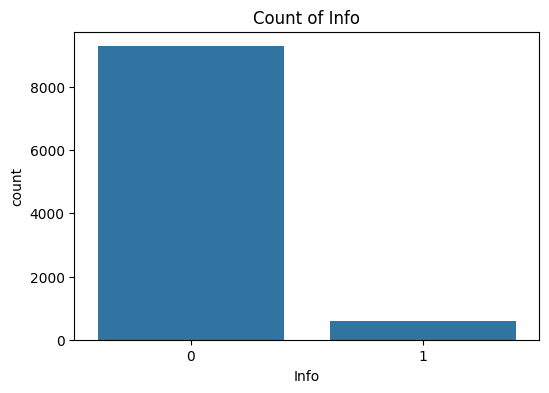

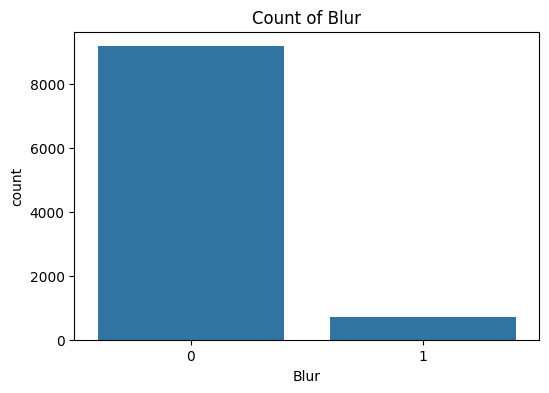

In [10]:
for column in train_data.columns[1:13]: 
    plt.figure(figsize = (6, 4))
    
    sns.countplot(x = column, 
                  data = train_data
                 )
    
    plt.title(f'Count of {column}')
    
    plt.show()


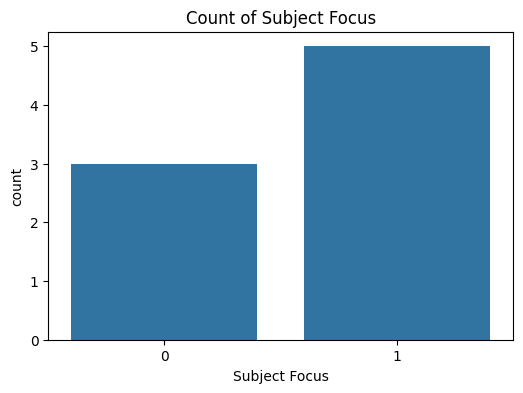

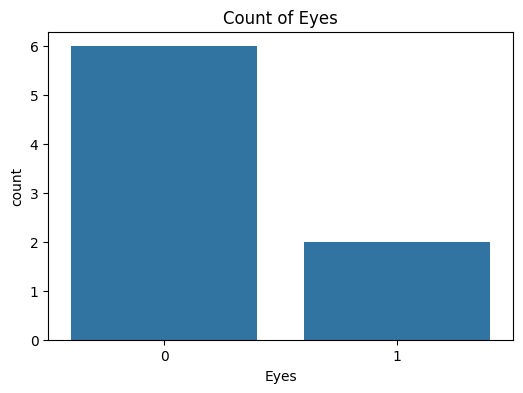

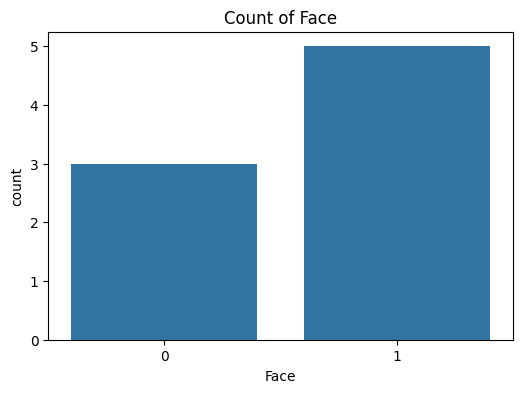

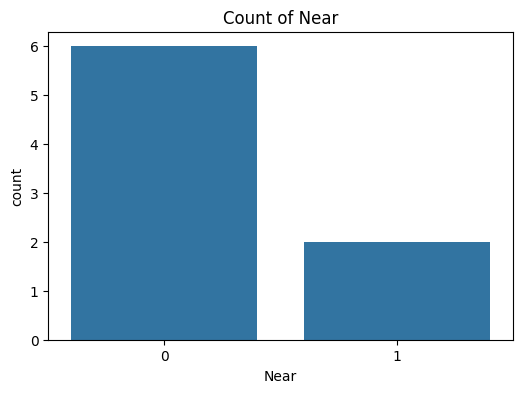

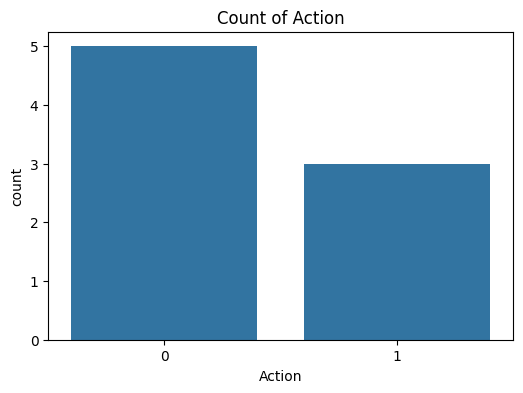

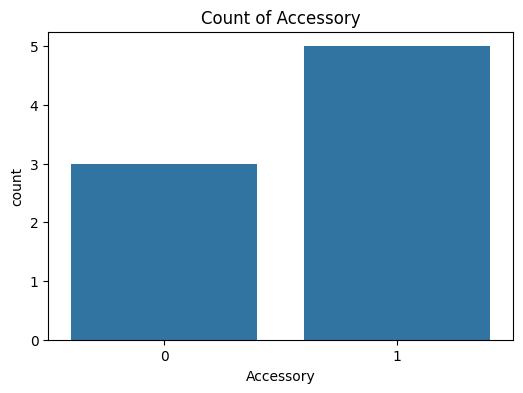

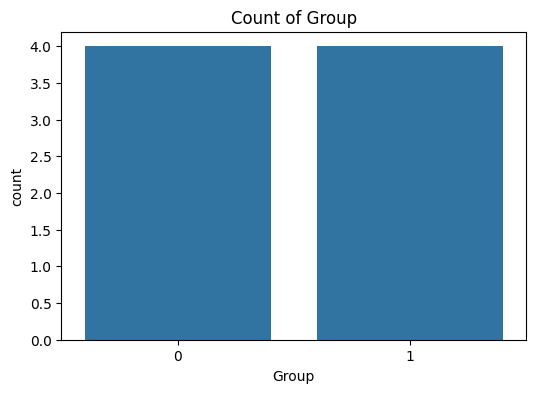

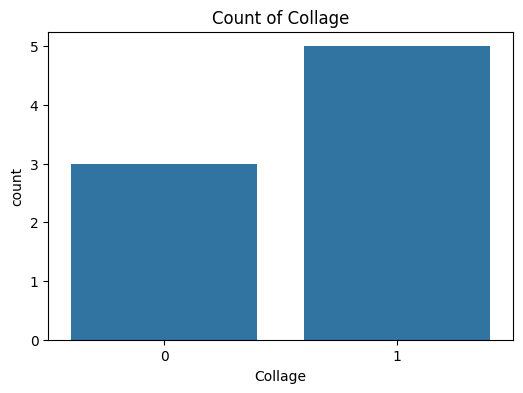

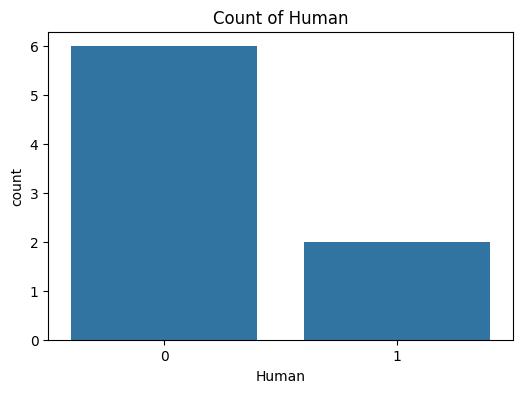

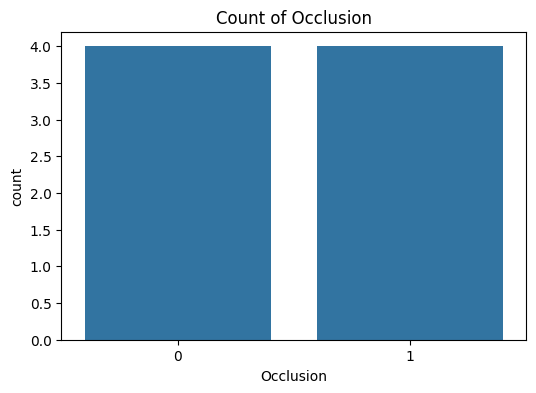

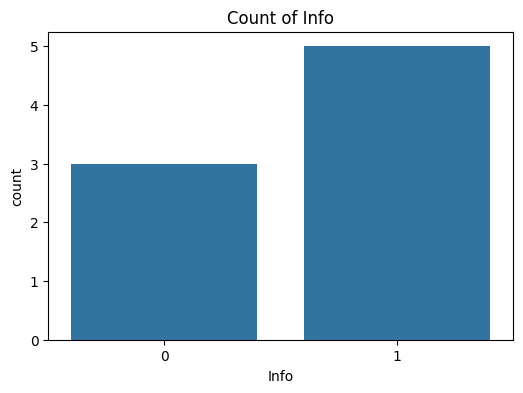

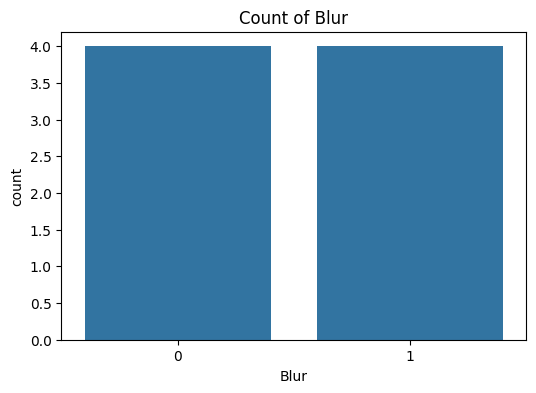

In [11]:
for column in test_data.columns[1:13]: 
    plt.figure(figsize = (6, 4))
    
    sns.countplot(x = column, 
                  data = test_data
                 )
    
    plt.title(f'Count of {column}')
    
    plt.show()


### Distribution of the Target Variable: *Pawpularity*

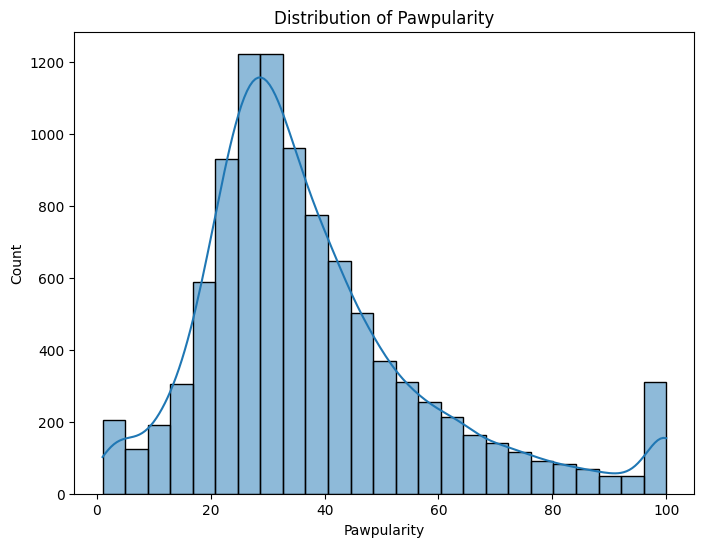

In [12]:
plt.figure(figsize = (8, 6))

sns.histplot(train_data['Pawpularity'], 
             bins = 25, 
             kde = True
            )

plt.title('Distribution of Pawpularity')

plt.show()


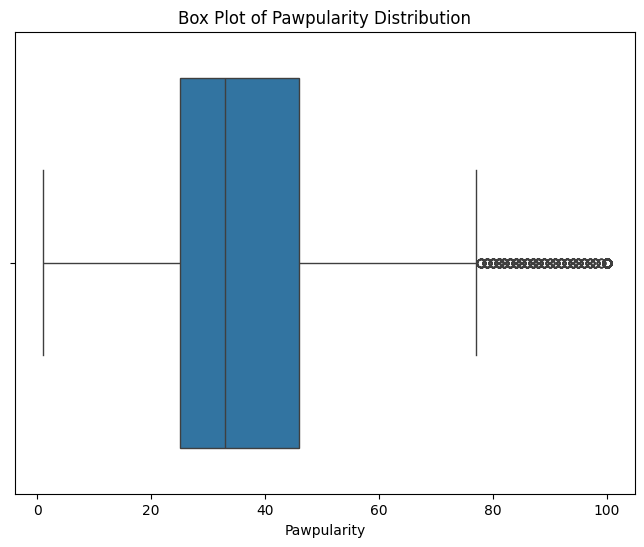

In [13]:
plt.figure(figsize = (8, 6))

sns.boxplot(x = train_data['Pawpularity'])

plt.title('Box Plot of Pawpularity Distribution')
plt.xlabel('Pawpularity')
plt.show()

In [14]:
train_data['Pawpularity'].describe()

count    9885.000000
mean       38.049975
std        20.599055
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

In [15]:
# Calculating the amount of outliers in Pawpularity
Q1 = 25
Q3 = 46
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers below and above the bounds
lower_outliers = train_data[train_data['Pawpularity'] < lower_bound].shape[0]
upper_outliers = train_data[train_data['Pawpularity'] > upper_bound].shape[0]

print("Number of Lower Outliers:", lower_outliers)
print("Number of Upper Outliers:", upper_outliers)


Number of Lower Outliers: 0
Number of Upper Outliers: 624


Once all variables are in the range of 0 to 1, it becomes more accurate to adjust Pawpularity to the same scale. Since Pawpularity represents a percentage, it can be transformed into values between 0 and 1, maintaining its context. Therefore, I divided the target by 100.

In [16]:
train_data['Pawpularity'] /= 100
train_data.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,0.63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,0.42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,0.28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,0.15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,0.72


### Correlaction between Variables

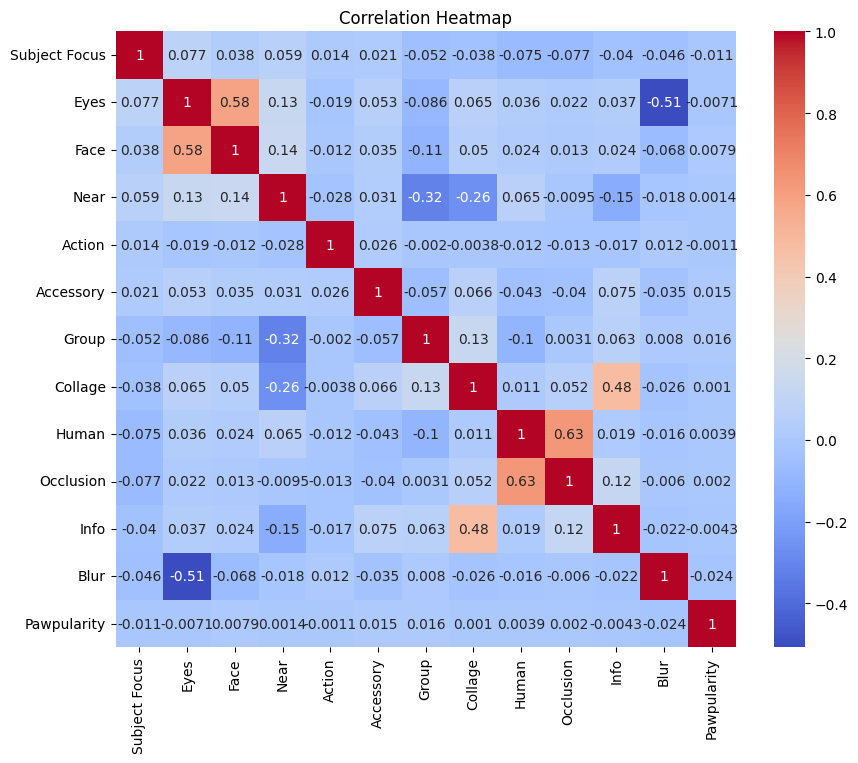

In [17]:
plt.figure(figsize = (10, 8))

sns.heatmap(train_data.iloc[:, 1:14].corr(), 
            annot = True, 
            cmap = 'coolwarm'
           )

plt.title('Correlation Heatmap')

plt.show()


There is not enough correlaction between variables in the data set, specially on the target variable.  

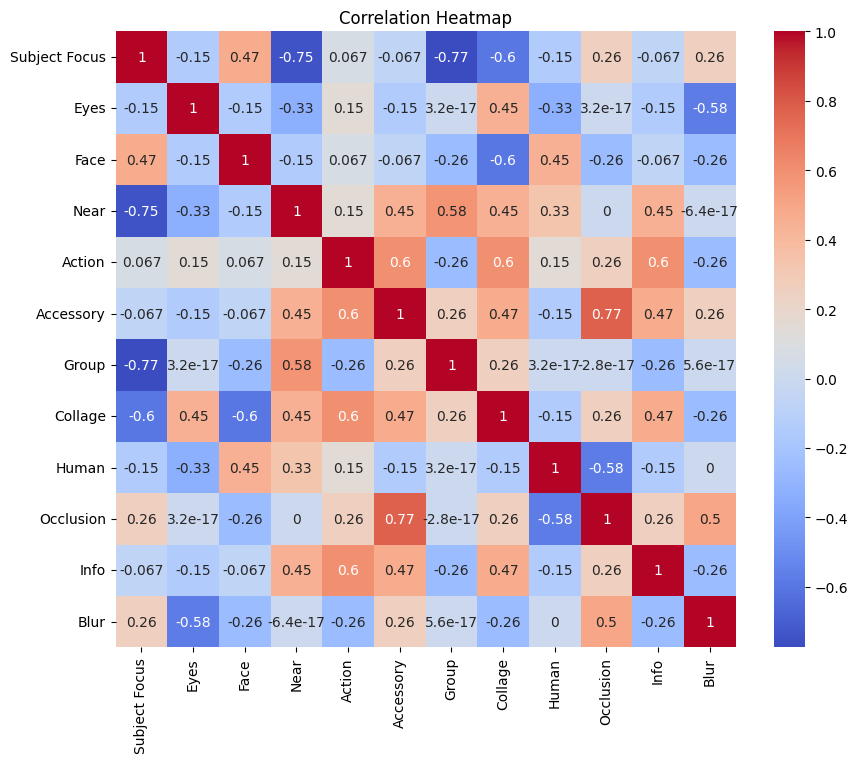

In [18]:
plt.figure(figsize = (10, 8))

sns.heatmap(test_data.iloc[:, 1:13].corr(), 
            annot = True, 
            cmap = 'coolwarm'
           )

plt.title('Correlation Heatmap')

plt.show()


For the test data set, it seems to be more correlaction between the different variables. 

### Comparison of Subject Focus between Train and Test Data

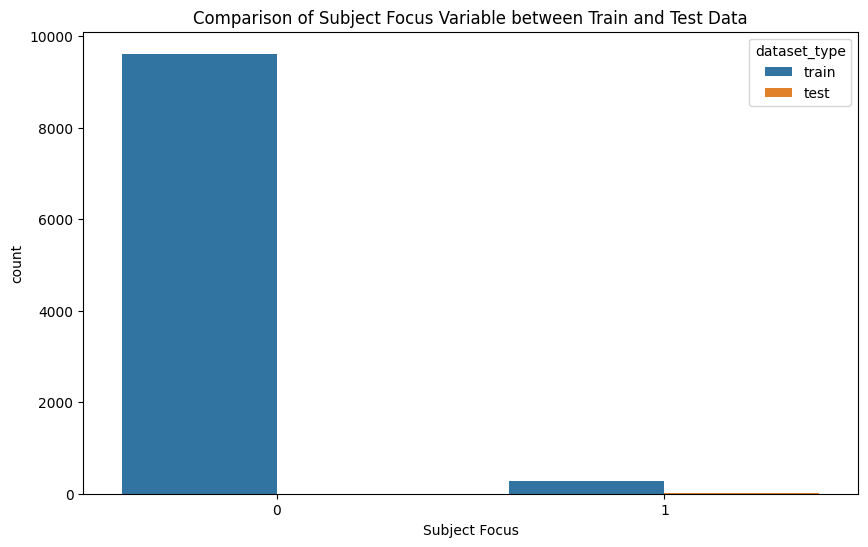

In [19]:
plt.figure(figsize=(10, 6))

combined_data = pd.concat([train_data.assign(dataset_type = 'train'), 
                           test_data.assign(dataset_type = 'test')]
                         )

sns.countplot(x = 'Subject Focus', 
              hue ='dataset_type', 
              data = combined_data,
              order = combined_data['Subject Focus'].value_counts().index,
             )

plt.title('Comparison of Subject Focus Variable between Train and Test Data')

plt.show()




### Satistical Analysis

In [20]:
for column in train_data.columns[1:13]:  
    print(f"{column}: Mean - {train_data[column].mean():.2f}, Std Dev - {train_data[column].std():.2f}")


Subject Focus: Mean - 0.03, Std Dev - 0.16
Eyes: Mean - 0.77, Std Dev - 0.42
Face: Mean - 0.90, Std Dev - 0.29
Near: Mean - 0.86, Std Dev - 0.35
Action: Mean - 0.01, Std Dev - 0.10
Accessory: Mean - 0.07, Std Dev - 0.25
Group: Mean - 0.13, Std Dev - 0.34
Collage: Mean - 0.05, Std Dev - 0.22
Human: Mean - 0.17, Std Dev - 0.37
Occlusion: Mean - 0.17, Std Dev - 0.38
Info: Mean - 0.06, Std Dev - 0.24
Blur: Mean - 0.07, Std Dev - 0.26


#### Interpretation

*Subject Focus*: Mean - 0.03, Std Dev - 0.16

Most values are 0, with a relatively low standard deviation. This suggests that the vast majority of examples have low or absent Subject Focus.


*Eyes*: Mean - 0.77, Std Dev - 0.42

Most values are 1, indicating that the majority of images have visible eyes. The relatively high standard deviation suggests a considerable variety in values.


*Face*: Mean - 0.90, Std Dev - 0.29

The mean is almost 1 suggesting that the vast majority of images have a visible face. The moderate standard deviation indicates some variability in values.


*Near*: Mean - 0.86, Std Dev - 0.35

The high mean suggests that many images are taken from a close distance. The moderate standard deviation suggests some variability in distances.

*Action*: Mean - 0.01, Std Dev - 0.10

The mean close to 0 indicates that most images do not exhibit clear action. The low standard deviation suggests little variation in this attribute.

*Accessory*: Mean - 0.07, Std Dev - 0.25

The mean suggests that most images have no accessories. The moderate standard deviation suggests some variability.


*Group*: Mean - 0.13, Std Dev - 0.34

The mean suggests that some images might have a group of subjects, but it's not very common. The relatively high standard deviation indicates a fair amount of variability in the presence of groups


*Collage*: Mean - 0.05, Std Dev - 0.22

The low mean suggests that collages are not very common in the images. The standard deviation indicates some variability in this attribute.


*Human*: Mean - 0.17, Std Dev - 0.37

The mean suggests that some images have group of subjects, but it's not very common. The relatively high standard deviation indicates a fair amount of variability in the presence of groups.


*Occlusion*: Mean - 0.17, Std Dev - 0.38

The mean indicates that occlusion (partial blocking) of the subject is somewhat common. The standard deviation suggests variability in the degree of occlusion.


*Info*: Mean - 0.06, Std Dev - 0.24

The low mean suggests that images with information or text are not very common. The standard deviation indicates some variability.


*Blur*: Mean - 0.07, Std Dev - 0.26

The mean suggests that some level of blurriness might be present in the images, but it's not very common. The standard deviation indicates some variability.
